In [1]:
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
df= pd.read_csv('Bidstack-April2025.CSV',parse_dates=['INTERVAL_DATETIME'])
df2019= pd.read_csv('Bidstack-April2019.CSV')
#df= df.loc[df['INTERVAL_DATETIME'] == '2025-04-01']
df

,INTERVAL_DATETIME,DUID,PRICEBAND1,PRICEBAND2,PRICEBAND3,PRICEBAND4,PRICEBAND5,PRICEBAND6,PRICEBAND7,PRICEBAND8,...,BANDAVAIL3,BANDAVAIL4,BANDAVAIL5,BANDAVAIL6,BANDAVAIL7,BANDAVAIL8,BANDAVAIL9,BANDAVAIL10,Region,Generation Type
0,2025-04-01 04:05:00,JLA02,-978.9,0.00,177.14,245.60,279.93,587.23,1370.42,14145.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,VIC1,OCGT
1,2025-04-01 04:10:00,JLA02,-978.9,0.00,177.14,245.60,279.93,587.23,1370.42,14145.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,VIC1,OCGT
2,2025-04-01 04:15:00,JLA02,-978.9,0.00,177.14,245.60,279.93,587.23,1370.42,14145.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,VIC1,OCGT
3,2025-04-01 04:20:00,JLA02,-978.9,0.00,177.14,245.60,279.93,587.23,1370.42,14145.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,VIC1,OCGT
4,2025-04-01 04:25:00,JLA02,-978.9,0.00,177.14,245.60,279.93,587.23,1370.42,14145.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,VIC1,OCGT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667515,2025-05-01 03:40:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.00,221.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NSW1,Solar
1667516,2025-05-01 03:45:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.00,221.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NSW1,Solar
1667517,2025-05-01 03:50:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.00,221.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NSW1,Solar
1667518,2025-05-01 03:55:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.00,221.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NSW1,Solar


In [4]:
# Convert to datetime if not already
df['INTERVAL_DATETIME'] = pd.to_datetime(df['INTERVAL_DATETIME'])

# Create separate Date and Time columns
df['DATE'] = df['INTERVAL_DATETIME'].dt.date
df['TIME'] = df['INTERVAL_DATETIME'].dt.time

# Preview the result
print(df[['INTERVAL_DATETIME', 'DATE', 'TIME']].head())

    INTERVAL_DATETIME        DATE      TIME
0 2025-04-01 04:05:00  2025-04-01  04:05:00
1 2025-04-01 04:10:00  2025-04-01  04:10:00
2 2025-04-01 04:15:00  2025-04-01  04:15:00
3 2025-04-01 04:20:00  2025-04-01  04:20:00
4 2025-04-01 04:25:00  2025-04-01  04:25:00


In [5]:
df['Region'].unique()

array(['VIC1', 'QLD1', 'NSW1', 'SA1', 'TAS1'], dtype=object)

In [6]:
band_cols= [f'BANDAVAIL{i}' for i in range (1,11)]
df['AVAILABILITY']= df[band_cols].sum(axis=1)

In [7]:
df.loc[df['AVAILABILITY']!=0]['DUID'].nunique()

193

In [8]:
df['DUID'].nunique()

193

In [9]:
df.groupby(['Generation Type'])['DUID'].nunique()

Generation Type
Black Coal     34
OCGT           54
Solar         105
Name: DUID, dtype: int64

In [10]:
df.groupby(['Region','Generation Type'])['DUID'].nunique()

Region  Generation Type
NSW1    Black Coal         12
        OCGT               11
        Solar              39
QLD1    Black Coal         22
        OCGT                5
        Solar              35
SA1     OCGT               14
        Solar              16
TAS1    OCGT                4
VIC1    OCGT               20
        Solar              15
Name: DUID, dtype: int64

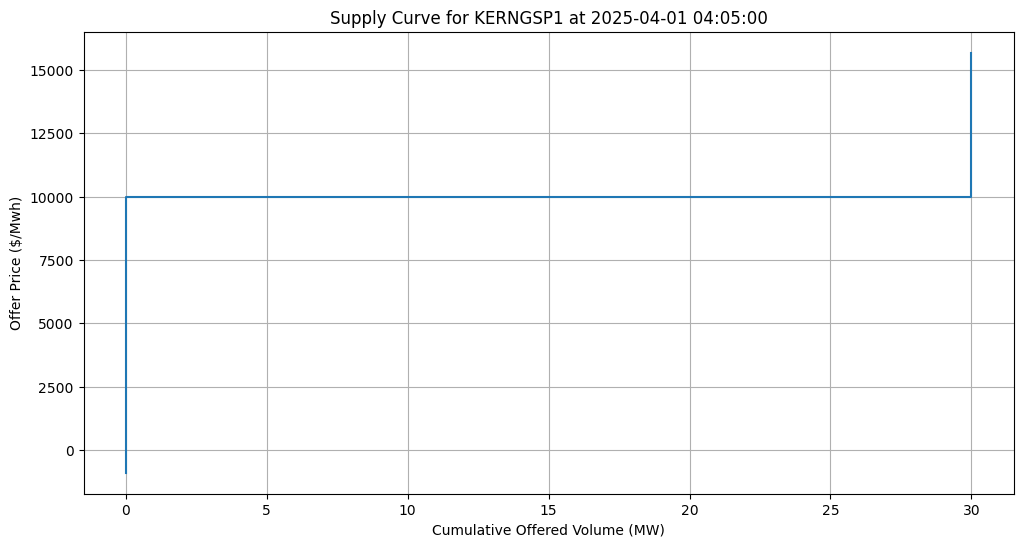

In [9]:
dfp=df.loc[df['Generation Type']=='Solar']
# Get availability and price band values

band_avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]
price_band_cols = [f'PRICEBAND{i}' for i in range (1, 11)]
avail_values = dfp.iloc[0][band_avail_cols].values
price_values = dfp. iloc[0][price_band_cols].values
# Sort by price
sorted_indices = price_values.argsort()
sorted_prices = price_values[sorted_indices]
sorted_avail = avail_values[sorted_indices]

# Cumulative availability for x-axis
cumulative_avail = sorted_avail. cumsum()
# Plot supply curve
plt.figure(figsize=(12, 6))

plt.step(cumulative_avail, sorted_prices, where='post') 
plt.xlabel('Cumulative Offered Volume (MW)')
plt.ylabel('Offer Price ($/Mwh)')
plt.title(f"Supply Curve for {dfp.iloc[0]['DUID']} at {dfp.iloc[0]['INTERVAL_DATETIME']}")
plt.grid (True)
plt.show()

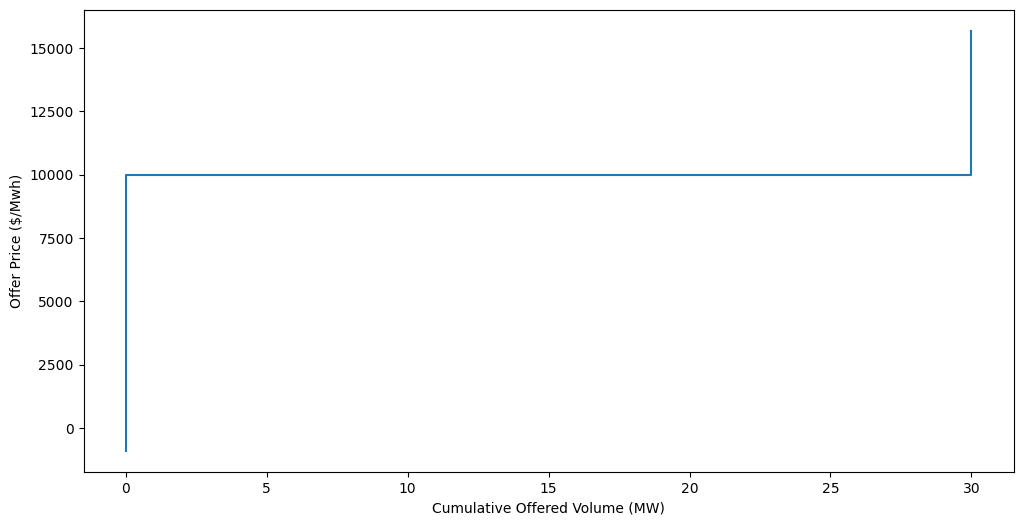

<class 'NameError'>: name 'dfp' is not defined

In [11]:
df["Hour"] = df["INTERVAL_DATETIME"].dt.hour
dfp_solar_13 = df.loc[(df['Generation Type'] == 'Solar') & (df['Hour'] == 13)]
# Get availability and price band values

band_avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]
price_band_cols = [f'PRICEBAND{i}' for i in range (1, 11)]
avail_values = dfp_solar_13.iloc[0][band_avail_cols].values
price_values = dfp_solar_13. iloc[0][price_band_cols].values
# Sort by price
sorted_indices = price_values.argsort()
sorted_prices = price_values[sorted_indices]
sorted_avail = avail_values[sorted_indices]

# Cumulative availability for x-axis
cumulative_avail = sorted_avail. cumsum()
# Plot supply curve
plt.figure(figsize=(12, 6))

plt.step(cumulative_avail, sorted_prices, where='post') 
plt.xlabel('Cumulative Offered Volume (MW)')
plt.ylabel('Offer Price ($/Mwh)')
plt.title(f"Supply Curve for {dfp.iloc[0]['DUID']} at {dfp.iloc[0]['INTERVAL_DATETIME']}")
plt.grid (True)
plt.show()

In [13]:
dfp_BC=df.loc[df['Generation Type']== 'Solar']
price_band_cols = [f'PRICEBAND{i}' for i in range (1, 11)]
price_band_cols = [F'PRICEBAND{i}' for i in range(1, 11)]
price_values = dfp_BC.iloc[0][price_band_cols].values
avail_values = dfp_BC.iloc[0][band_avail_cols]. values
# Find indices of win and max price
min_price_idx = price_values.argmin()
q25 = np. quantile(price_values, 0.25)
q50 = np. quantile(price_values, 0.50)
q75 = np. quantile(price_values, 0.75)
max_price_idx = price_values.argmax()
# Get corresponding quantities
quantity_at_min_price = (avail_values[min_price_idx]/avail_values.sum())*100
quantity_25 = (avail_values[price_values <= q25].sum()/avail_values.sum()) *100
quantity_50 = (avail_values[price_values <= q50].sum()/avail_values.sum())*100
quantity_75 = (avail_values[price_values <= q75].sum()/avail_values.sum())*100
quantity_at_max_price = (avail_values[max_price_idx]/avail_values.sum())*100
#mean_price = price_values.mean ()

# Print results
print(f"Min Price: {price_values[min_price_idx]:.2f},Quantity Offered:{quantity_at_min_price} %")
print(f"25th Percentile Price: {q25:.2f}, Quantity Offered: {quantity_25} %")
print(f"50th Percentile Price: {q50:.2f}, Quantity Offered: {quantity_50} %")
print(f"75th Percentile Price: {q75:.2f}, Quantity Offered: {quantity_75} %")
print(f"Max Price: {price_values[max_price_idx]:.2f}, Quantity Offered: {quantity_at_max_price} %")

Min Price: -895.60,Quantity Offered:0.0 %
25th Percentile Price: 12.50, Quantity Offered: 0.0 %
50th Percentile Price: 87.50, Quantity Offered: 0.0 %
75th Percentile Price: 4000.00, Quantity Offered: 0.0 %
Max Price: 15672.89, Quantity Offered: 100.0 %


In [11]:
dfp_OCGT=df.loc[df['Generation Type']== 'OCGT']
price_band_cols = [f'PRICEBAND{i}' for i in range (1, 11)]
price_band_cols = [F'PRICEBAND{i}' for i in range(1, 11)]
price_values = dfp_OCGT.iloc[0][price_band_cols].values
avail_values = dfp_OCGT.iloc[0][band_avail_cols]. values
# Find indices of win and max price
min_price_idx = price_values.argmin()
q25 = np. quantile(price_values, 0.25)
q50 = np. quantile(price_values, 0.50)
q75 = np. quantile(price_values, 0.75)
max_price_idx = price_values.argmax()
# Get corresponding quantities
quantity_at_min_price = (avail_values[min_price_idx]/avail_values.sum())*100
quantity_25 = (avail_values[price_values <= q25].sum()/avail_values.sum()) *100
quantity_50 = (avail_values[price_values <= q50].sum()/avail_values.sum())*100
quantity_75 = (avail_values[price_values <= q75].sum()/avail_values.sum())*100
quantity_at_max_price = (avail_values[max_price_idx]/avail_values.sum())*100
#mean_price = price_values.mean ()

# Print results
print(f"Min Price: {price_values[min_price_idx]:.2f},Quantity Offered:{quantity_at_min_price} %")
print(f"25th Percentile Price: {q25:.2f}, Quantity Offered: {quantity_25} %")
print(f"50th Percentile Price: {q50:.2f}, Quantity Offered: {quantity_50} %")
print(f"75th Percentile Price: {q75:.2f}, Quantity Offered: {quantity_75} %")
print(f"Max Price: {price_values[max_price_idx]:.2f}, Quantity Offered: {quantity_at_max_price} %")

Min Price: -978.90,Quantity Offered:0.0 %
25th Percentile Price: 194.25, Quantity Offered: 0.0 %
50th Percentile Price: 433.58, Quantity Offered: 0.0 %
75th Percentile Price: 10951.44, Quantity Offered: 0.0 %
Max Price: 17130.75, Quantity Offered: 100.0 %


In [12]:
dfp_solar=df.loc[df['Generation Type']== 'Solar']
price_band_cols = [f'PRICEBAND{i}' for i in range (1, 11)]
price_band_cols = [F'PRICEBAND{i}' for i in range(1, 11)]
price_values = dfp_solar.iloc[0][price_band_cols].values
avail_values = dfp_solar.iloc[0][band_avail_cols]. values
# Find indices of win and max price
min_price_idx = price_values.argmin()
q25 = np. quantile(price_values, 0.25)
q50 = np. quantile(price_values, 0.50)
q75 = np. quantile(price_values, 0.75)
max_price_idx = price_values.argmax()
# Get corresponding quantities
quantity_at_min_price = (avail_values[min_price_idx]/avail_values.sum())*100
quantity_25 = (avail_values[price_values <= q25].sum()/avail_values.sum()) *100
quantity_50 = (avail_values[price_values <= q50].sum()/avail_values.sum())*100
quantity_75 = (avail_values[price_values <= q75].sum()/avail_values.sum())*100
quantity_at_max_price = (avail_values[max_price_idx]/avail_values.sum())*100
#mean_price = price_values.mean ()

# Print results
print(f"Min Price: {price_values[min_price_idx]:.2f},Quantity Offered:{quantity_at_min_price} %")
print(f"25th Percentile Price: {q25:.2f}, Quantity Offered: {quantity_25} %")
print(f"50th Percentile Price: {q50:.2f}, Quantity Offered: {quantity_50} %")
print(f"75th Percentile Price: {q75:.2f}, Quantity Offered: {quantity_75} %")
print(f"Max Price: {price_values[max_price_idx]:.2f}, Quantity Offered: {quantity_at_max_price} %")

Min Price: -895.60,Quantity Offered:0.0 %
25th Percentile Price: 12.50, Quantity Offered: 0.0 %
50th Percentile Price: 87.50, Quantity Offered: 0.0 %
75th Percentile Price: 4000.00, Quantity Offered: 0.0 %
Max Price: 15672.89, Quantity Offered: 100.0 %


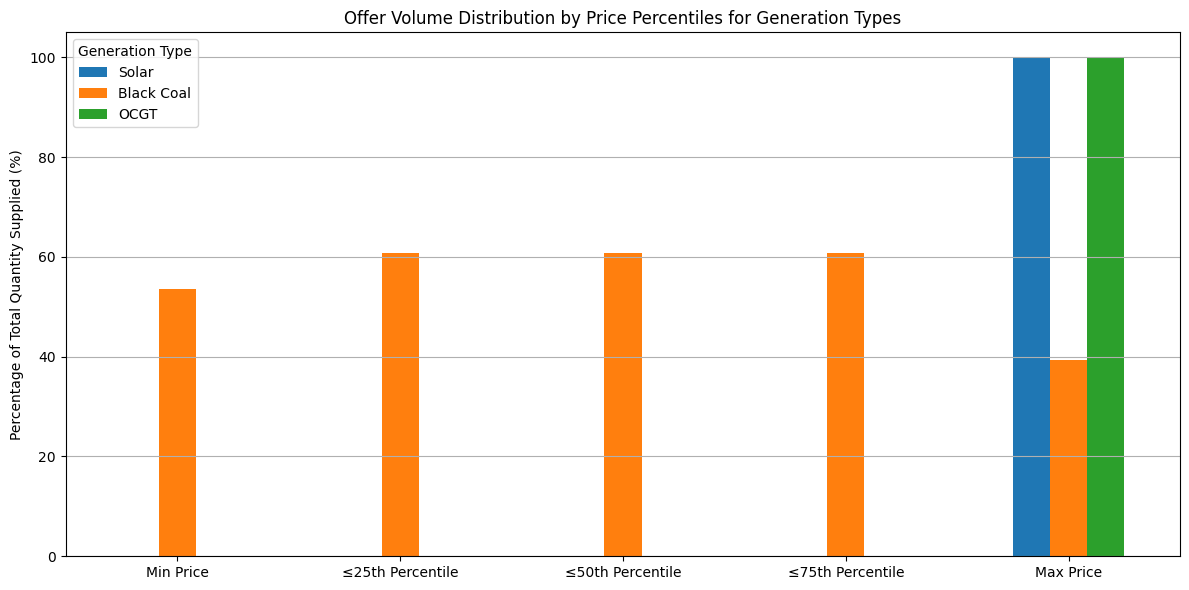

In [14]:


# Define generation types to compare
generation_types = ['Solar', 'Black Coal', 'OCGT']

# Initialize result dictionary
results = {
    'Generation Type': [],
    'Min Price': [],
    '≤25th Percentile': [],
    '≤50th Percentile': [],
    '≤75th Percentile': [],
    'Max Price': []
}

# Loop through each generation type
for gen_type in generation_types:
    dfp = df[df['Generation Type'] == gen_type]

    # Use first row as example (you can extend to average over all rows if desired)
    price_band_cols = [f'PRICEBAND{i}' for i in range(1, 11)]
    band_avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]

    price_values = dfp.iloc[0][price_band_cols].values
    avail_values = dfp.iloc[0][band_avail_cols].values

    # Handle potential issues with NaN or zero division
    if avail_values.sum() == 0:
        continue

    # Price percentiles
    q25 = np.quantile(price_values, 0.25)
    q50 = np.quantile(price_values, 0.50)
    q75 = np.quantile(price_values, 0.75)

    # Price level indices
    min_price_idx = price_values.argmin()
    max_price_idx = price_values.argmax()

    # Calculate quantity proportions
    total_avail = avail_values.sum()
    pct_min = (avail_values[min_price_idx] / total_avail) * 100
    pct_25 = (avail_values[price_values <= q25].sum() / total_avail) * 100
    pct_50 = (avail_values[price_values <= q50].sum() / total_avail) * 100
    pct_75 = (avail_values[price_values <= q75].sum() / total_avail) * 100
    pct_max = (avail_values[max_price_idx] / total_avail) * 100

    # Store results
    results['Generation Type'].append(gen_type)
    results['Min Price'].append(pct_min)
    results['≤25th Percentile'].append(pct_25)
    results['≤50th Percentile'].append(pct_50)
    results['≤75th Percentile'].append(pct_75)
    results['Max Price'].append(pct_max)

# Convert to DataFrame for plotting
results_df = pd.DataFrame(results)
results_df.set_index('Generation Type', inplace=True)

# Plotting
results_df.T.plot(kind='bar', figsize=(12, 6))
plt.ylabel("Percentage of Total Quantity Supplied (%)")
plt.title("Offer Volume Distribution by Price Percentiles for Generation Types")
plt.grid(axis='y')
plt.legend(title="Generation Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


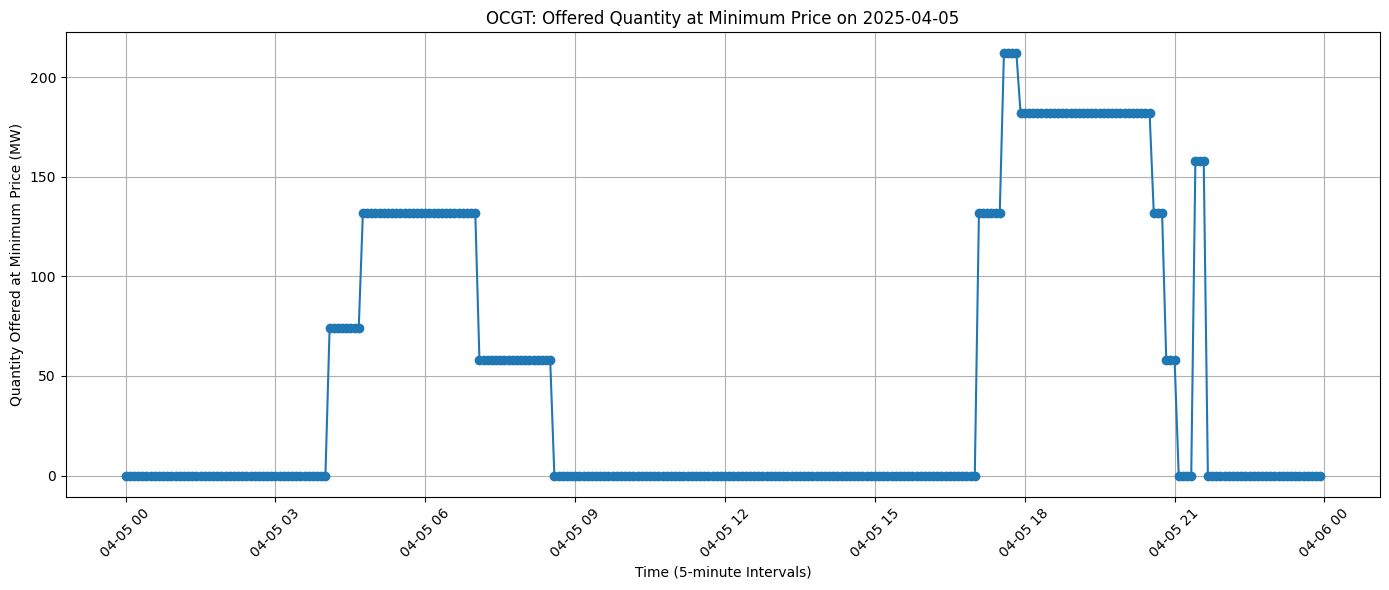

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and date fields
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date

# Define target date
target_date = pd.to_datetime("2025-04-05").date()

# Filter for OCGT generators on the specific date
ocgt_df = df[
    (df["Generation Type"] == "OCGT") &
    (df["DATE"] == target_date)
]

# Group and aggregate quantity at min price band (BANDAVAIL1)
min_price_offer = ocgt_df.groupby("INTERVAL_DATETIME")["BANDAVAIL1"].sum()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(min_price_offer.index, min_price_offer.values, marker='o', linestyle='-')
plt.xlabel("Time (5-minute Intervals)")
plt.ylabel("Quantity Offered at Minimum Price (MW)")
plt.title(f"OCGT: Offered Quantity at Minimum Price on {target_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


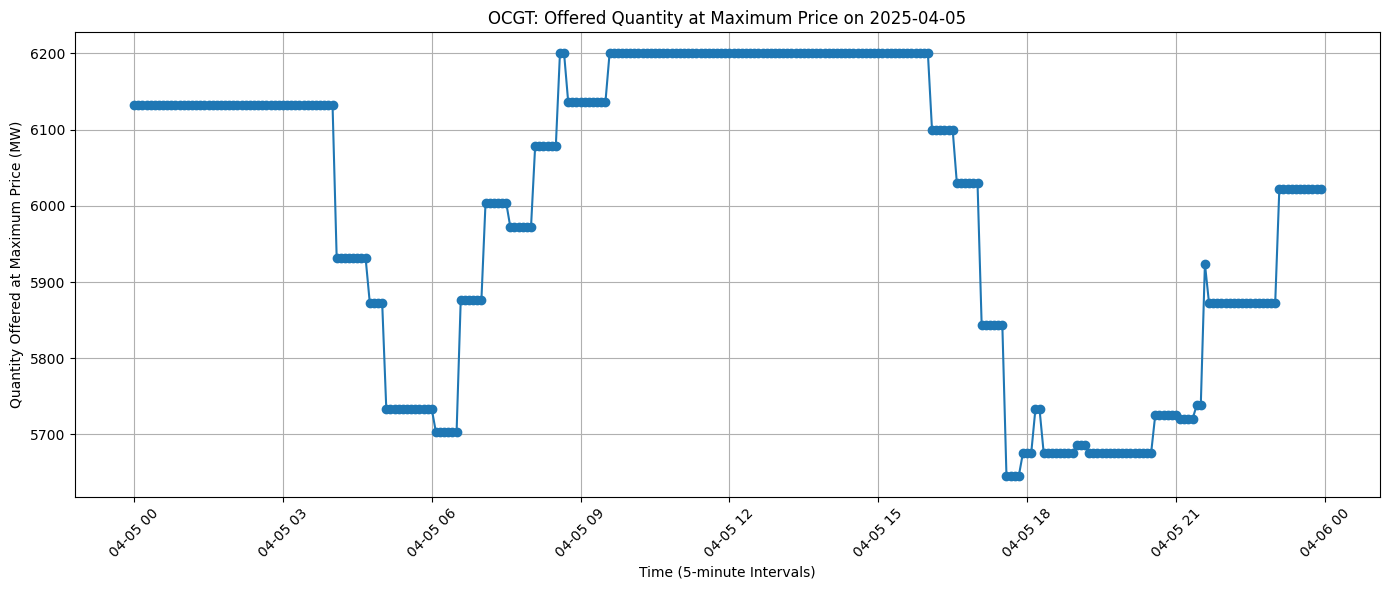

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and extract date
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date

# Define date to filter
target_date = pd.to_datetime("2025-04-05").date()

# Filter for OCGT on the target date
ocgt_df = df[
    (df["Generation Type"] == "OCGT") &
    (df["DATE"] == target_date)
]

# Aggregate max price band availability across all DUIDs by time
max_price_offer = ocgt_df.groupby("INTERVAL_DATETIME")["BANDAVAIL10"].sum()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(max_price_offer.index, max_price_offer.values, marker='o', linestyle='-')
plt.xlabel("Time (5-minute Intervals)")
plt.ylabel("Quantity Offered at Maximum Price (MW)")
plt.title(f"OCGT: Offered Quantity at Maximum Price on {target_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


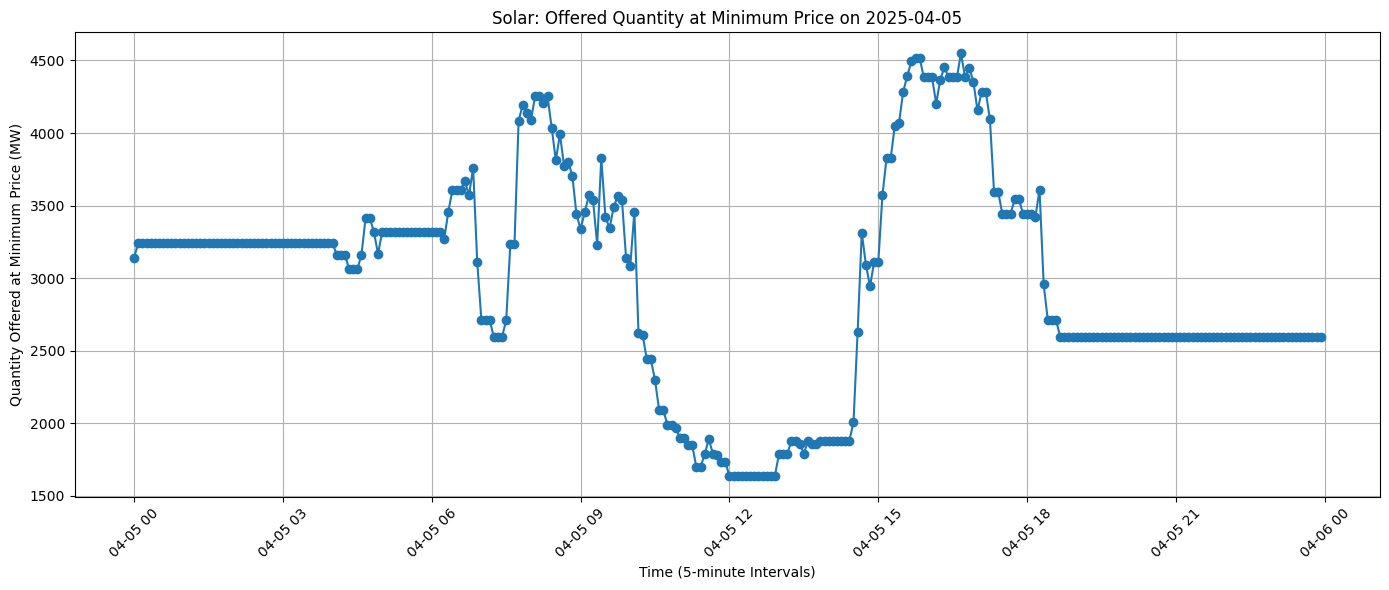

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and date fields
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date

# Define the target date
target_date = pd.to_datetime("2025-04-05").date()

# Filter for Solar generation type on the target date
solar_df = df[
    (df["Generation Type"] == "Solar") &
    (df["DATE"] == target_date)
]

# Aggregate BANDAVAIL1 by 5-minute intervals
min_price_offer_solar = solar_df.groupby("INTERVAL_DATETIME")["BANDAVAIL1"].sum()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(min_price_offer_solar.index, min_price_offer_solar.values, marker='o', linestyle='-')
plt.xlabel("Time (5-minute Intervals)")
plt.ylabel("Quantity Offered at Minimum Price (MW)")
plt.title(f"Solar: Offered Quantity at Minimum Price on {target_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


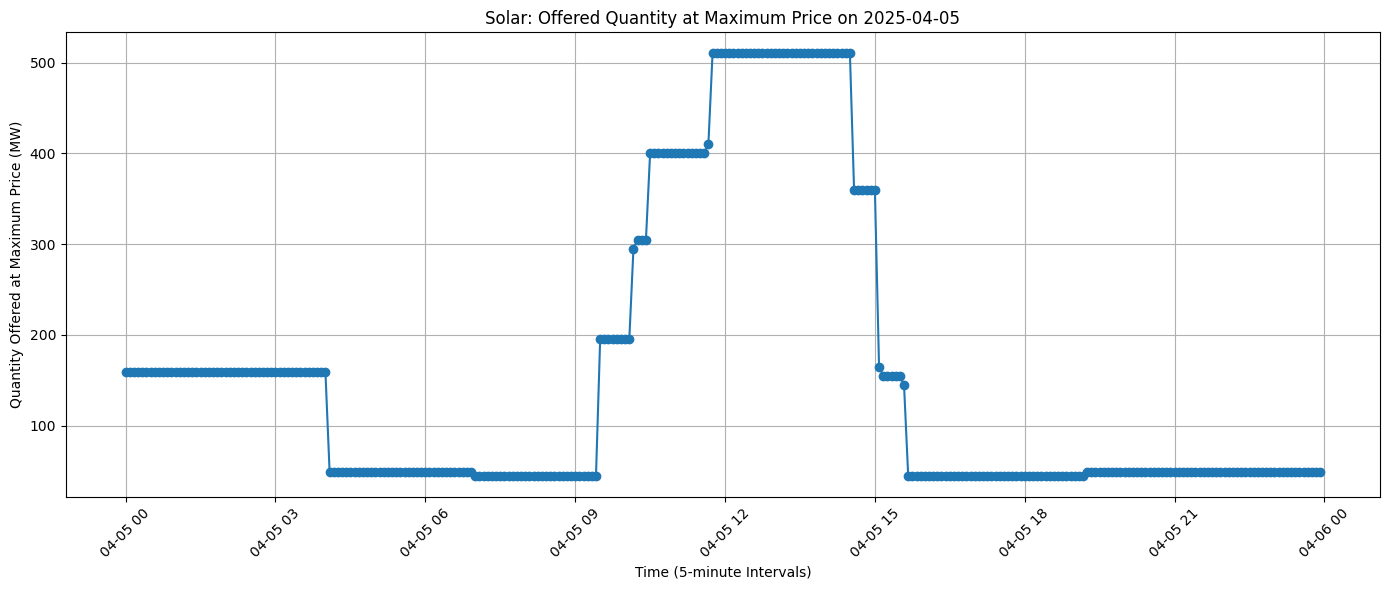

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and date fields
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date

# Define the target date
target_date = pd.to_datetime("2025-04-05").date()

# Filter for Solar generators on the target date
solar_df = df[
    (df["Generation Type"] == "Solar") &
    (df["DATE"] == target_date)
]

# Group by interval and sum quantity at maximum price band (BANDAVAIL10)
max_price_offer = solar_df.groupby("INTERVAL_DATETIME")["BANDAVAIL10"].sum()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(max_price_offer.index, max_price_offer.values, marker='o', linestyle='-')
plt.xlabel("Time (5-minute Intervals)")
plt.ylabel("Quantity Offered at Maximum Price (MW)")
plt.title(f"Solar: Offered Quantity at Maximum Price on {target_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


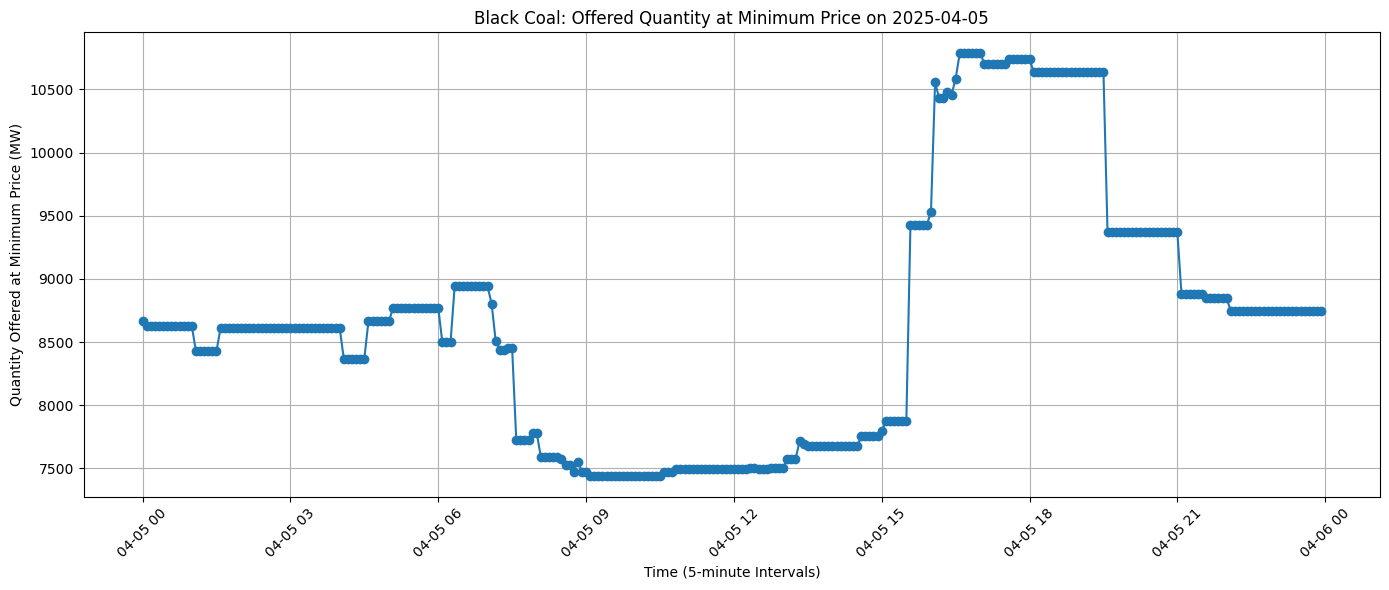

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and date fields
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date

# Define the target date
target_date = pd.to_datetime("2025-04-05").date()

# Filter for Black Coal generators on the specified date
coal_df = df[
    (df["Generation Type"] == "Black Coal") &
    (df["DATE"] == target_date)
]

# Aggregate the quantity at minimum price band (BANDAVAIL1) across 5-minute intervals
min_price_offer_coal = coal_df.groupby("INTERVAL_DATETIME")["BANDAVAIL1"].sum()

# Plot the result
plt.figure(figsize=(14, 6))
plt.plot(min_price_offer_coal.index, min_price_offer_coal.values, marker='o', linestyle='-')
plt.xlabel("Time (5-minute Intervals)")
plt.ylabel("Quantity Offered at Minimum Price (MW)")
plt.title(f"Black Coal: Offered Quantity at Minimum Price on {target_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


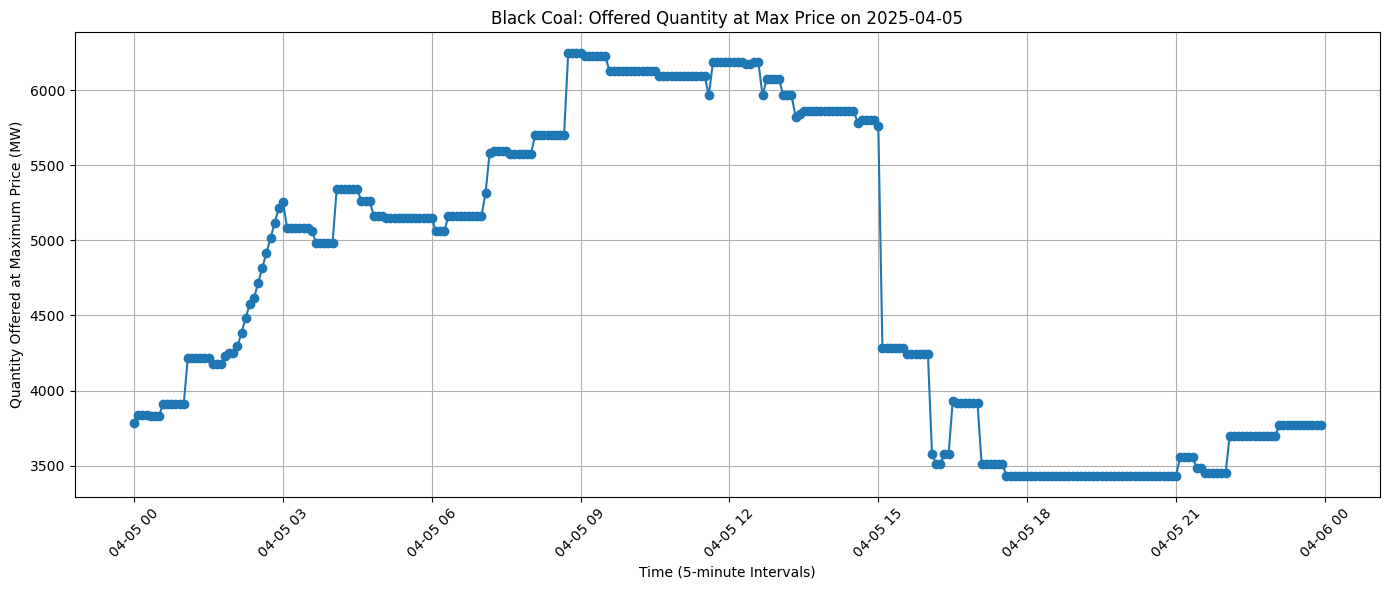

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and date fields
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date

# Define target date
target_date = pd.to_datetime("2025-04-05").date()

# Filter for Black Coal generators on the specific date
black_coal_df = df[
    (df["Generation Type"] == "Black Coal") &
    (df["DATE"] == target_date)
]

# Group and aggregate quantity at max price band (BANDAVAIL10)
max_price_offer = black_coal_df.groupby("INTERVAL_DATETIME")["BANDAVAIL10"].sum()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(max_price_offer.index, max_price_offer.values, marker='o', linestyle='-')
plt.xlabel("Time (5-minute Intervals)")
plt.ylabel("Quantity Offered at Maximum Price (MW)")
plt.title(f"Black Coal: Offered Quantity at Max Price on {target_date}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Filter for Solar generators
solar_df = df[df['Generation Type'] == 'Black Coal'].copy()

# Compute total availability for each row
solar_df['Availability'] = solar_df[band_avail_cols].sum(axis=1)

# Group by DUID and sum total availability across all records
duid_avail = solar_df.groupby('DUID')['Availability'].sum()

# Sort in descending order
duid_avail_sorted = duid_avail.sort_values(ascending=False)

# Display the result
print(duid_avail_sorted)

DUID
MPP_1       11605750.0
MPP_2       11586740.0
KPP_1        6799680.0
BW02         6566400.0
BW03         6566400.0
BW04         6566400.0
ER04         6483482.0
ER02         6480630.0
ER01         6480150.0
ER03         6480002.0
BW01         6350400.0
MP1          6307200.0
MP2          6048000.0
VP5          5875200.0
VP6          5875200.0
TNPS1        4147200.0
CPP_4        4026240.0
CPP_3        4026240.0
TARONG#3     3328620.0
TARONG#1     3326855.0
STAN-2       3326400.0
TARONG#2     3326400.0
TARONG#4     3326400.0
STAN-1       3326400.0
STAN-3       3326400.0
STAN-4       3326400.0
CALL_B_1     3024000.0
CALL_B_2     3024000.0
GSTONE4      2419235.0
GSTONE5      2419235.0
GSTONE2      2419235.0
GSTONE3      2419235.0
GSTONE1      2419200.0
GSTONE6      2419200.0
Name: Availability, dtype: float64


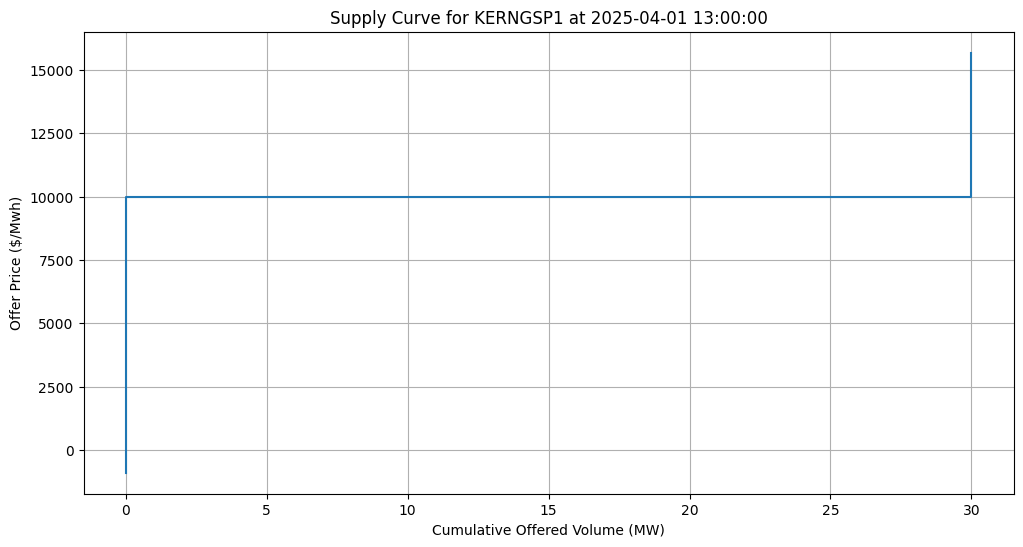

In [18]:
dfp = df.loc[(df['Generation Type'] == 'Solar') & (df['Hour'] == 13)]
# Get availability and price band values

band_avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]
price_band_cols = [f'PRICEBAND{i}' for i in range (1, 11)]
avail_values = dfp.iloc[0][band_avail_cols].values
price_values = dfp. iloc[0][price_band_cols].values
# Sort by price
sorted_indices = price_values.argsort()
sorted_prices = price_values[sorted_indices]
sorted_avail = avail_values[sorted_indices]

# Cumulative availability for x-axis
cumulative_avail = sorted_avail. cumsum()
# Plot supply curve
plt.figure(figsize=(12, 6))

plt.step(cumulative_avail, sorted_prices, where='post') 
plt.xlabel('Cumulative Offered Volume (MW)')
plt.ylabel('Offer Price ($/Mwh)')
plt.title(f"Supply Curve for {dfp.iloc[0]['DUID']} at {dfp.iloc[0]['INTERVAL_DATETIME']}")
plt.grid (True)
plt.show()


In [21]:
# Filter: Solar generation type at 1 PM (Hour == 13)
solar_1pm_df = df[(df['Generation Type'] == 'Black Coal') & (df['Region'] == 'QLD1')].copy()

# Calculate total availability for each row
solar_1pm_df['Availability'] = solar_1pm_df[band_avail_cols].sum(axis=1)

# Group by DUID and sum total availability across all 1 PM intervals
duid_availability = solar_1pm_df.groupby('DUID')['Availability'].sum()

# Sort in descending order
duid_availability_sorted = duid_availability.sort_values(ascending=False)

# Display the ranked DUIDs
print(duid_availability_sorted)

DUID
MPP_1       11605750.0
MPP_2       11586740.0
KPP_1        6799680.0
TNPS1        4147200.0
CPP_4        4026240.0
CPP_3        4026240.0
TARONG#3     3328620.0
TARONG#1     3326855.0
STAN-1       3326400.0
STAN-2       3326400.0
TARONG#4     3326400.0
TARONG#2     3326400.0
STAN-4       3326400.0
STAN-3       3326400.0
CALL_B_1     3024000.0
CALL_B_2     3024000.0
GSTONE2      2419235.0
GSTONE5      2419235.0
GSTONE4      2419235.0
GSTONE3      2419235.0
GSTONE6      2419200.0
GSTONE1      2419200.0
Name: Availability, dtype: float64


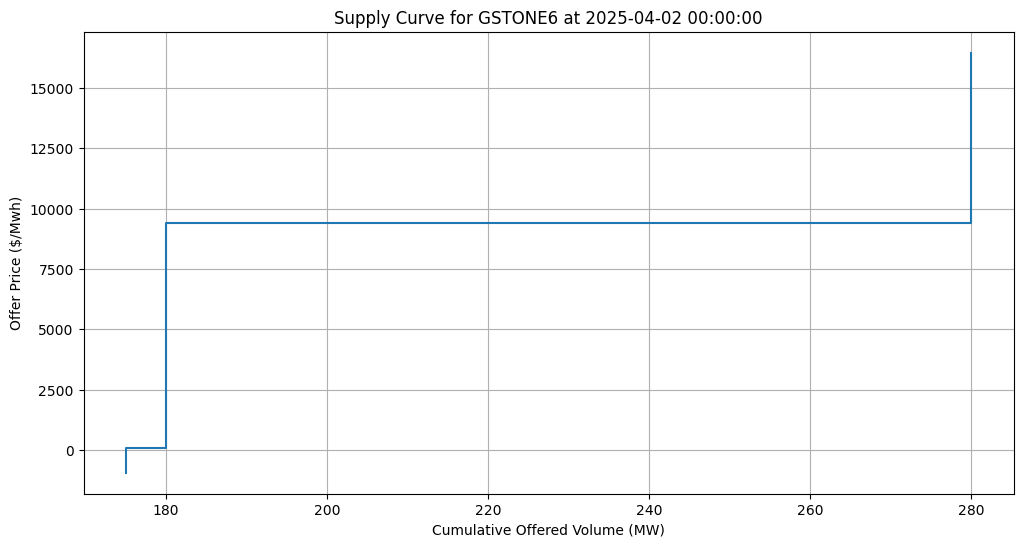

In [26]:
dfp = df.loc[(df['Generation Type'] == 'Black Coal') & 
             (df['Region'] == 'QLD1') & 
             (df['Date'] == pd.to_datetime('2025-04-02').date())]
#dfp = df.loc[(df['Generation Type'] == 'Black Coal')] & (df['DUID'] == 'GSTONE1') & (df['DATE'] == '2025-04-02')
# Get availability and price band values

band_avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]
price_band_cols = [f'PRICEBAND{i}' for i in range (1, 11)]
avail_values = dfp.iloc[0][band_avail_cols].values
price_values = dfp. iloc[0][price_band_cols].values
# Sort by price
sorted_indices = price_values.argsort()
sorted_prices = price_values[sorted_indices]
sorted_avail = avail_values[sorted_indices]

# Cumulative availability for x-axis
cumulative_avail = sorted_avail. cumsum()
# Plot supply curve
plt.figure(figsize=(12, 6))

plt.step(cumulative_avail, sorted_prices, where='post') 
plt.xlabel('Cumulative Offered Volume (MW)')
plt.ylabel('Offer Price ($/Mwh)')
plt.title(f"Supply Curve for {dfp.iloc[0]['DUID']} at {dfp.iloc[0]['INTERVAL_DATETIME']}")
plt.grid (True)
plt.show()

In [39]:
dfp = df.loc[(df['Generation Type'] == 'Solar') & 
             (df['Region'] == 'NSW1')]
             #(df['Date'] == pd.to_datetime('2025-04-02').date())]

In [40]:
dfp

,INTERVAL_DATETIME,DUID,PRICEBAND1,PRICEBAND2,PRICEBAND3,PRICEBAND4,PRICEBAND5,PRICEBAND6,PRICEBAND7,PRICEBAND8,...,BANDAVAIL9,BANDAVAIL10,Region,Generation Type,Date,Time,DATE,TIME,AVAILABILITY,Hour
1152,2025-04-01 04:05:00,MOLNGSF1,-961.6,-456.76,-96.16,-31.73,-25.96,-23.08,0.0,288.48,...,0.0,0.0,NSW1,Solar,2025-04-01,04:05:00,2025-04-01,04:05:00,30.0,4
1153,2025-04-01 04:10:00,MOLNGSF1,-961.6,-456.76,-96.16,-31.73,-25.96,-23.08,0.0,288.48,...,0.0,0.0,NSW1,Solar,2025-04-01,04:10:00,2025-04-01,04:10:00,30.0,4
1154,2025-04-01 04:15:00,MOLNGSF1,-961.6,-456.76,-96.16,-31.73,-25.96,-23.08,0.0,288.48,...,0.0,0.0,NSW1,Solar,2025-04-01,04:15:00,2025-04-01,04:15:00,30.0,4
1155,2025-04-01 04:20:00,MOLNGSF1,-961.6,-456.76,-96.16,-31.73,-25.96,-23.08,0.0,288.48,...,0.0,0.0,NSW1,Solar,2025-04-01,04:20:00,2025-04-01,04:20:00,30.0,4
1156,2025-04-01 04:25:00,MOLNGSF1,-961.6,-456.76,-96.16,-31.73,-25.96,-23.08,0.0,288.48,...,0.0,0.0,NSW1,Solar,2025-04-01,04:25:00,2025-04-01,04:25:00,30.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667515,2025-05-01 03:40:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.0,221.33,...,0.0,0.0,NSW1,Solar,2025-05-01,03:40:00,2025-05-01,03:40:00,150.0,3
1667516,2025-05-01 03:45:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.0,221.33,...,0.0,0.0,NSW1,Solar,2025-05-01,03:45:00,2025-05-01,03:45:00,150.0,3
1667517,2025-05-01 03:50:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.0,221.33,...,0.0,0.0,NSW1,Solar,2025-05-01,03:50:00,2025-05-01,03:50:00,150.0,3
1667518,2025-05-01 03:55:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.0,221.33,...,0.0,0.0,NSW1,Solar,2025-05-01,03:55:00,2025-05-01,03:55:00,150.0,3


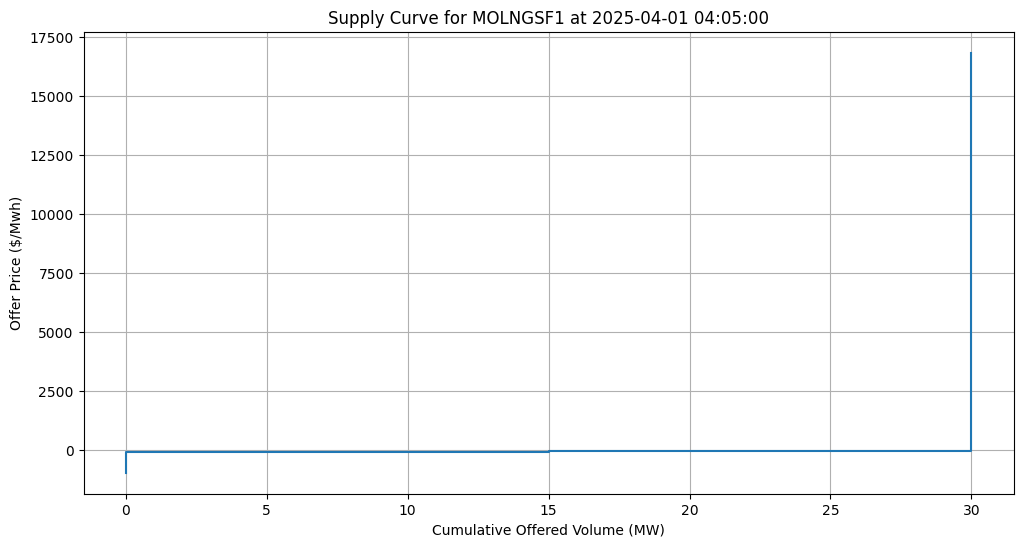

In [41]:
dfp = df.loc[(df['Generation Type'] == 'Solar') & 
             (df['Region'] == 'NSW1')]
#dfp = df.loc[(df['Generation Type'] == 'Solar') & 
             #(df['Region'] == 'NSW1') & 
             #(df['Date'] == pd.to_datetime('2025-04-02').date())]
#dfp = df.loc[(df['Generation Type'] == 'Black Coal')] & (df['DUID'] == 'GSTONE1') & (df['DATE'] == '2025-04-02')
# Get availability and price band values

band_avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]
price_band_cols = [f'PRICEBAND{i}' for i in range (1, 11)]
avail_values = dfp.iloc[0][band_avail_cols].values
price_values = dfp. iloc[0][price_band_cols].values
# Sort by price
sorted_indices = price_values.argsort()
sorted_prices = price_values[sorted_indices]
sorted_avail = avail_values[sorted_indices]

# Cumulative availability for x-axis
cumulative_avail = sorted_avail. cumsum()
# Plot supply curve
plt.figure(figsize=(12, 6))

plt.step(cumulative_avail, sorted_prices, where='post') 
plt.xlabel('Cumulative Offered Volume (MW)')
plt.ylabel('Offer Price ($/Mwh)')
plt.title(f"Supply Curve for {dfp.iloc[0]['DUID']} at {dfp.iloc[0]['INTERVAL_DATETIME']}")
plt.grid (True)
plt.show()


In [50]:
dfp

,INTERVAL_DATETIME,DUID,PRICEBAND1,PRICEBAND2,PRICEBAND3,PRICEBAND4,PRICEBAND5,PRICEBAND6,PRICEBAND7,PRICEBAND8,...,BANDAVAIL9,BANDAVAIL10,Region,Generation Type,Date,Time,DATE,TIME,AVAILABILITY,Hour
1152,2025-04-01 04:05:00,MOLNGSF1,-961.6,-456.76,-96.16,-31.73,-25.96,-23.08,0.0,288.48,...,0.0,0.0,NSW1,Solar,2025-04-01,04:05:00,2025-04-01,04:05:00,30.0,4
1153,2025-04-01 04:10:00,MOLNGSF1,-961.6,-456.76,-96.16,-31.73,-25.96,-23.08,0.0,288.48,...,0.0,0.0,NSW1,Solar,2025-04-01,04:10:00,2025-04-01,04:10:00,30.0,4
1154,2025-04-01 04:15:00,MOLNGSF1,-961.6,-456.76,-96.16,-31.73,-25.96,-23.08,0.0,288.48,...,0.0,0.0,NSW1,Solar,2025-04-01,04:15:00,2025-04-01,04:15:00,30.0,4
1155,2025-04-01 04:20:00,MOLNGSF1,-961.6,-456.76,-96.16,-31.73,-25.96,-23.08,0.0,288.48,...,0.0,0.0,NSW1,Solar,2025-04-01,04:20:00,2025-04-01,04:20:00,30.0,4
1156,2025-04-01 04:25:00,MOLNGSF1,-961.6,-456.76,-96.16,-31.73,-25.96,-23.08,0.0,288.48,...,0.0,0.0,NSW1,Solar,2025-04-01,04:25:00,2025-04-01,04:25:00,30.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667515,2025-05-01 03:40:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.0,221.33,...,0.0,0.0,NSW1,Solar,2025-05-01,03:40:00,2025-05-01,03:40:00,150.0,3
1667516,2025-05-01 03:45:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.0,221.33,...,0.0,0.0,NSW1,Solar,2025-05-01,03:45:00,2025-05-01,03:45:00,150.0,3
1667517,2025-05-01 03:50:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.0,221.33,...,0.0,0.0,NSW1,Solar,2025-05-01,03:50:00,2025-05-01,03:50:00,150.0,3
1667518,2025-05-01 03:55:00,WLWLSF2,-885.3,-110.66,-66.40,-39.84,-26.56,-22.13,0.0,221.33,...,0.0,0.0,NSW1,Solar,2025-05-01,03:55:00,2025-05-01,03:55:00,150.0,3


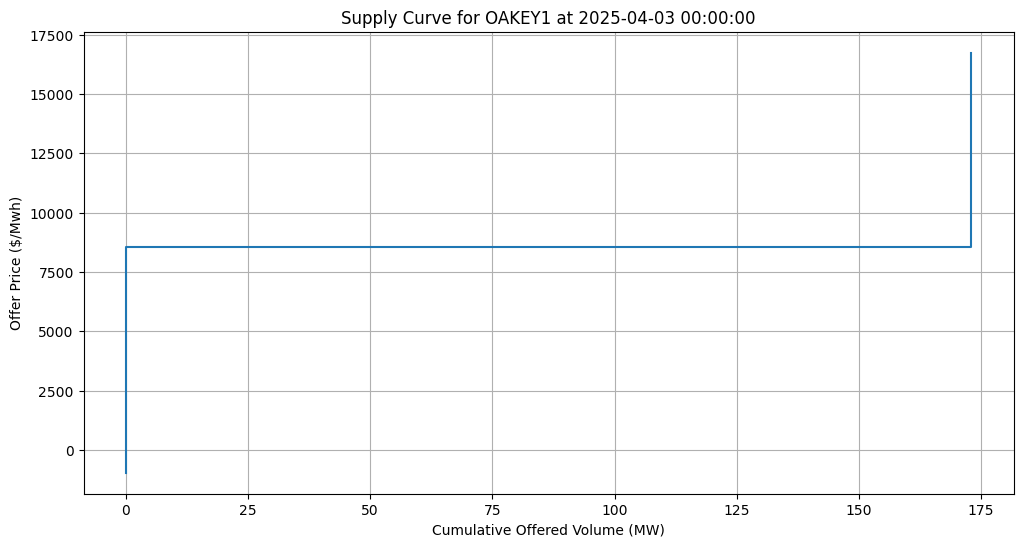

In [32]:
dfp = df.loc[(df['Generation Type'] == 'OCGT') & 
             (df['Region'] == 'QLD1') & 
             (df['Date'] == pd.to_datetime('2025-04-03').date())]
#dfp = df.loc[(df['Generation Type'] == 'Black Coal')] & (df['DUID'] == 'GSTONE1') & (df['DATE'] == '2025-04-02')
# Get availability and price band values

band_avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]
price_band_cols = [f'PRICEBAND{i}' for i in range (1, 11)]
avail_values = dfp.iloc[0][band_avail_cols].values
price_values = dfp. iloc[0][price_band_cols].values
# Sort by price
sorted_indices = price_values.argsort()
sorted_prices = price_values[sorted_indices]
sorted_avail = avail_values[sorted_indices]

# Cumulative availability for x-axis
cumulative_avail = sorted_avail. cumsum()
# Plot supply curve
plt.figure(figsize=(12, 6))

plt.step(cumulative_avail, sorted_prices, where='post') 
plt.xlabel('Cumulative Offered Volume (MW)')
plt.ylabel('Offer Price ($/Mwh)')
plt.title(f"Supply Curve for {dfp.iloc[0]['DUID']} at {dfp.iloc[0]['INTERVAL_DATETIME']}")
plt.grid (True)
plt.show()

<ipython-input-52-c1ceabf34b47>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_nsw["FirstMWPrice"] = solar_nsw.apply(get_first_mw_price, axis=1)


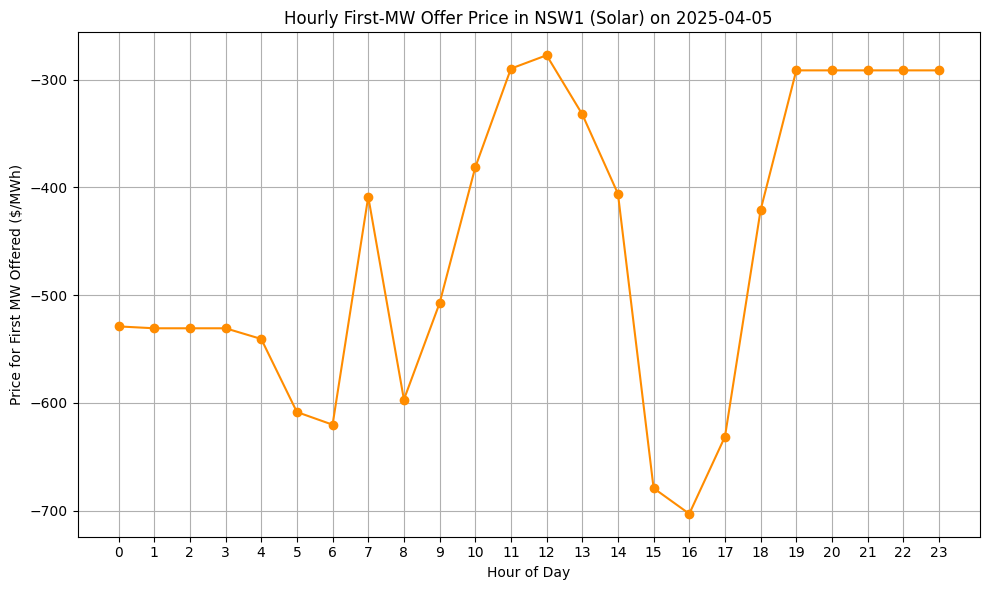

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime formatting
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date
df["HOUR"] = df["INTERVAL_DATETIME"].dt.hour

# Define the target date
target_date = pd.to_datetime("2025-04-05").date()

# Filter data
solar_nsw = df[
    (df["Region"] == "NSW1") &
    (df["Generation Type"] == "Solar") &
    (df["DATE"] == target_date)
]

# Define price and availability columns
price_cols = [f"PRICEBAND{i}" for i in range(1, 11)]
avail_cols = [f"BANDAVAIL{i}" for i in range(1, 11)]

# Function to find first MW price for each row
def get_first_mw_price(row):
    for p, a in zip(row[price_cols], row[avail_cols]):
        if a > 0:
            return p
    return None

# Apply the function
solar_nsw["FirstMWPrice"] = solar_nsw.apply(get_first_mw_price, axis=1)

# Group by hour and calculate mean first MW price
hourly_first_price = solar_nsw.groupby("HOUR")["FirstMWPrice"].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_first_price.index, hourly_first_price.values, marker='o', color='darkorange')
plt.xlabel("Hour of Day")
plt.ylabel("Price for First MW Offered ($/MWh)")
plt.title(f"Hourly First-MW Offer Price in NSW1 (Solar) on {target_date}")
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()
plt.show()


<ipython-input-53-ad32a5b1f05f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_nsw["MaxMWPrice"] = solar_nsw.apply(get_max_avail_price, axis=1)


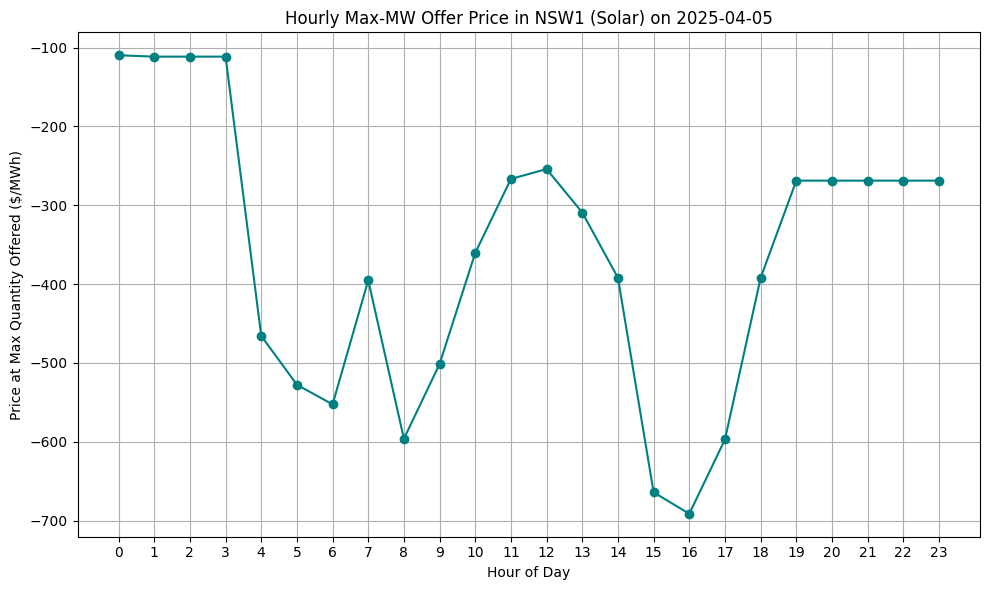

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime formatting
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date
df["HOUR"] = df["INTERVAL_DATETIME"].dt.hour

# Define target date
target_date = pd.to_datetime("2025-04-05").date()

# Filter for NSW1, Solar, and target date
solar_nsw = df[
    (df["Region"] == "NSW1") &
    (df["Generation Type"] == "Solar") &
    (df["DATE"] == target_date)
]

# Define price and availability columns
price_cols = [f"PRICEBAND{i}" for i in range(1, 11)]
avail_cols = [f"BANDAVAIL{i}" for i in range(1, 11)]

# Function to get price with max availability
def get_max_avail_price(row):
    max_idx = row[avail_cols].values.argmax()
    return row[price_cols].values[max_idx]

# Apply to each row
solar_nsw["MaxMWPrice"] = solar_nsw.apply(get_max_avail_price, axis=1)

# Group by hour and take average price where max MW occurs
hourly_max_price = solar_nsw.groupby("HOUR")["MaxMWPrice"].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_max_price.index, hourly_max_price.values, marker='o', color='teal')
plt.xlabel("Hour of Day")
plt.ylabel("Price at Max Quantity Offered ($/MWh)")
plt.title(f"Hourly Max-MW Offer Price in NSW1 (Solar) on {target_date}")
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()
plt.show()


<ipython-input-61-713573ef13c3>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_nsw["MaxMWPrice"] = solar_nsw.apply(get_max_avail_price, axis=1)


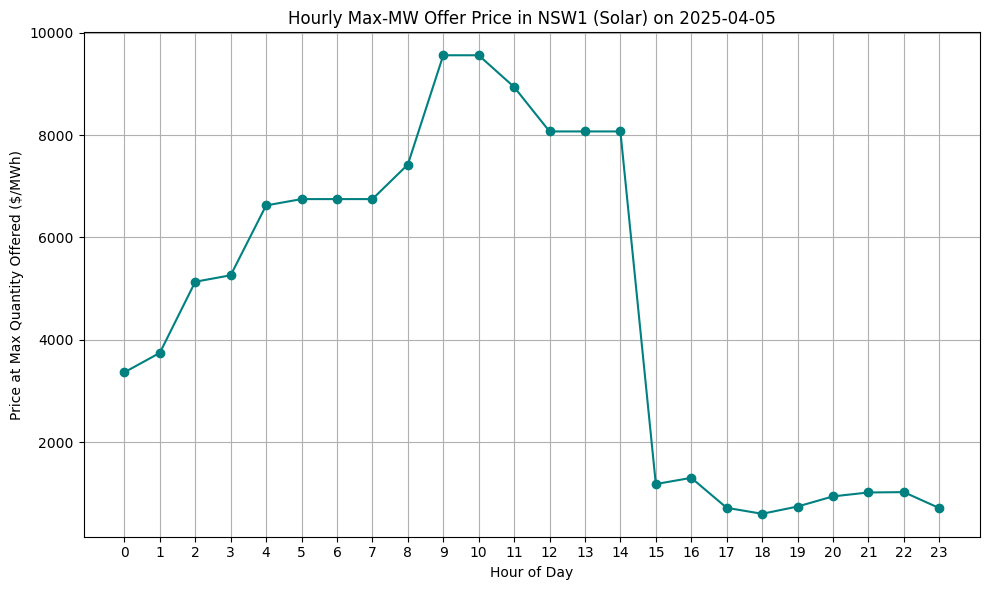

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime formatting
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date
df["HOUR"] = df["INTERVAL_DATETIME"].dt.hour

# Define target date
target_date = pd.to_datetime("2025-04-05").date()

# Filter for NSW1, Solar, and target date
solar_nsw = df[
    (df["Region"] == "NSW1") &
    (df["Generation Type"] == "Black Coal") &
    (df["DATE"] == target_date)
]

# Define price and availability columns
price_cols = [f"PRICEBAND{i}" for i in range(1, 11)]
avail_cols = [f"BANDAVAIL{i}" for i in range(1, 11)]

# Function to get price with max availability
def get_max_avail_price(row):
    max_idx = row[avail_cols].values.argmax()
    return row[price_cols].values[max_idx]

# Apply to each row
solar_nsw["MaxMWPrice"] = solar_nsw.apply(get_max_avail_price, axis=1)

# Group by hour and take average price where max MW occurs
hourly_max_price = solar_nsw.groupby("HOUR")["MaxMWPrice"].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_max_price.index, hourly_max_price.values, marker='o', color='teal')
plt.xlabel("Hour of Day")
plt.ylabel("Price at Max Quantity Offered ($/MWh)")
plt.title(f"Hourly Max-MW Offer Price in NSW1 (Solar) on {target_date}")
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()
plt.show()


<ipython-input-62-740ca31b4709>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_nsw["MaxMWPrice"] = solar_nsw.apply(get_max_avail_price, axis=1)


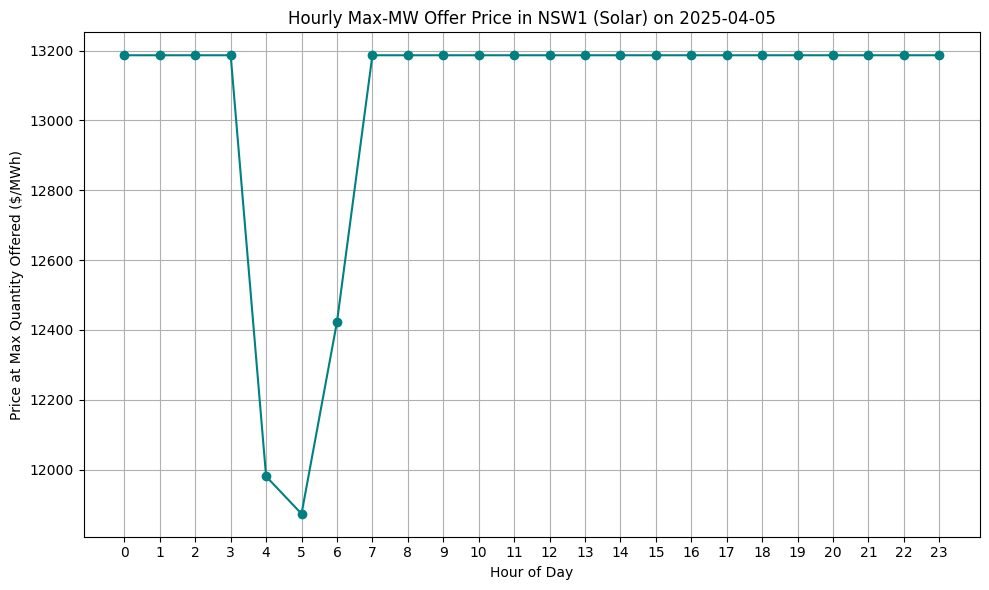

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime formatting
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date
df["HOUR"] = df["INTERVAL_DATETIME"].dt.hour

# Define target date
target_date = pd.to_datetime("2025-04-05").date()

# Filter for NSW1, Solar, and target date
solar_nsw = df[
    (df["Region"] == "NSW1") &
    (df["Generation Type"] == "OCGT") &
    (df["DATE"] == target_date)
]

# Define price and availability columns
price_cols = [f"PRICEBAND{i}" for i in range(1, 11)]
avail_cols = [f"BANDAVAIL{i}" for i in range(1, 11)]

# Function to get price with max availability
def get_max_avail_price(row):
    max_idx = row[avail_cols].values.argmax()
    return row[price_cols].values[max_idx]

# Apply to each row
solar_nsw["MaxMWPrice"] = solar_nsw.apply(get_max_avail_price, axis=1)

# Group by hour and take average price where max MW occurs
hourly_max_price = solar_nsw.groupby("HOUR")["MaxMWPrice"].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_max_price.index, hourly_max_price.values, marker='o', color='teal')
plt.xlabel("Hour of Day")
plt.ylabel("Price at Max Quantity Offered ($/MWh)")
plt.title(f"Hourly Max-MW Offer Price in NSW1 (Solar) on {target_date}")
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()
plt.show()


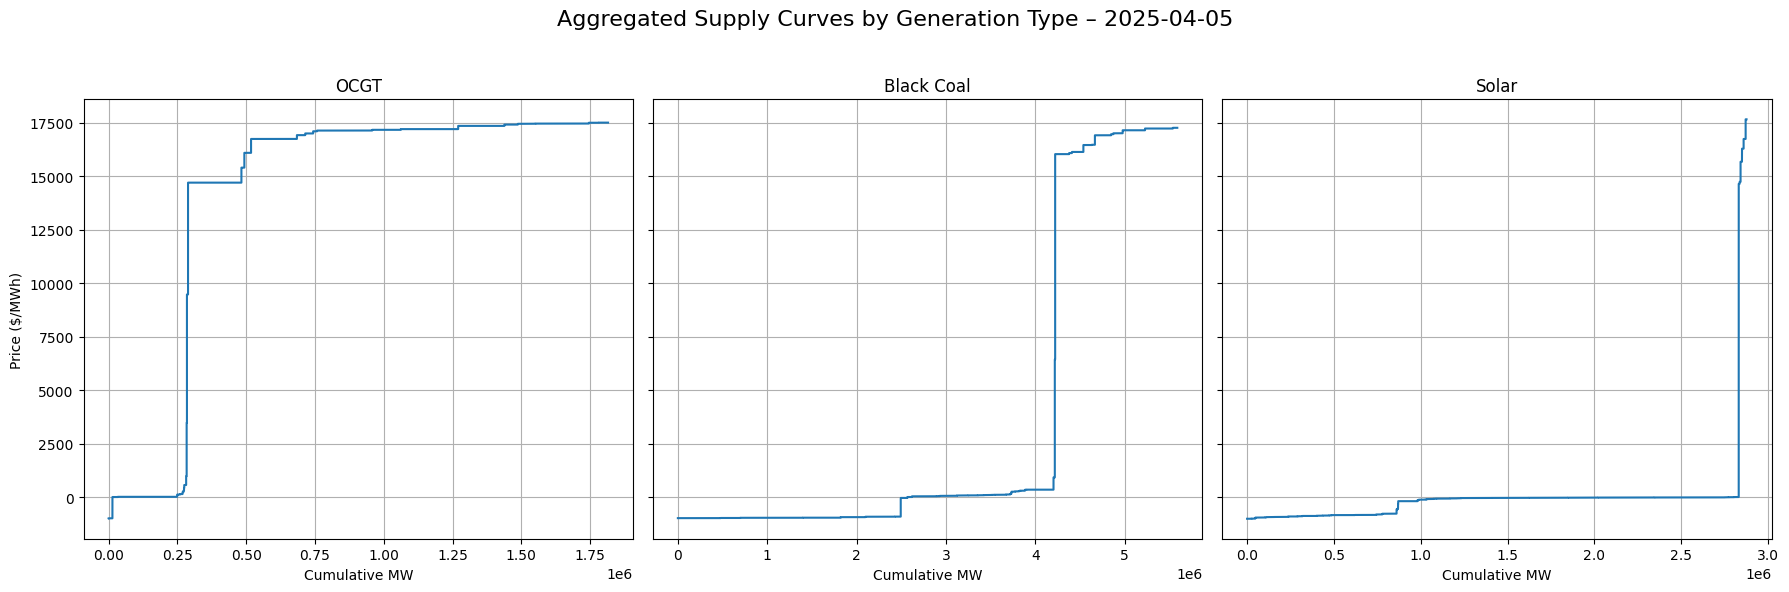

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime formatting and date extraction
df["INTERVAL_DATETIME"] = pd.to_datetime(df["INTERVAL_DATETIME"])
df["DATE"] = df["INTERVAL_DATETIME"].dt.date

# Target date for analysis
target_date = pd.to_datetime("2025-04-05").date()

# Filter data for the date
df_day = df[df["DATE"] == target_date]

# Define columns
band_avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]
price_band_cols = [f'PRICEBAND{i}' for i in range(1, 11)]

# List of unique generation types for comparison
gen_types = df_day["Generation Type"].unique()

# Plot setup
fig, axs = plt.subplots(nrows=1, ncols=len(gen_types), figsize=(6 * len(gen_types), 6), sharey=True)

if len(gen_types) == 1:
    axs = [axs]  # Ensure axs is iterable if only one plot

# Loop through each generation type and plot supply curve
for ax, gen in zip(axs, gen_types):
    df_gen = df_day[df_day["Generation Type"] == gen]
    
    # Flatten all price and availability data
    all_prices = df_gen[price_band_cols].values.flatten()
    all_avail = df_gen[band_avail_cols].values.flatten()

    # Remove zero/negative availabilities and corresponding prices
    valid_indices = all_avail > 0
    all_prices = all_prices[valid_indices]
    all_avail = all_avail[valid_indices]

    # Sort by price
    sorted_indices = all_prices.argsort()
    sorted_prices = all_prices[sorted_indices]
    sorted_avail = all_avail[sorted_indices]

    # Cumulative MW
    cumulative_mw = sorted_avail.cumsum()

    # Plot
    ax.step(cumulative_mw, sorted_prices, where='post')
    ax.set_title(gen)
    ax.set_xlabel("Cumulative MW")
    ax.grid(True)

axs[0].set_ylabel("Price ($/MWh)")
fig.suptitle(f"Aggregated Supply Curves by Generation Type – {target_date}", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<ipython-input-28-01d0217b11cc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_demand_df['Total_Offered_Value'] = high_demand_df[price_cols].values @ high_demand_df[band_avail_cols].values.T.diagonal()
<ipython-input-28-01d0217b11cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_demand_df['Total_Offered_Volume'] = high_demand_df[band_avail_cols].sum(axis=1)
<ipython-input-28-01d0217b11cc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

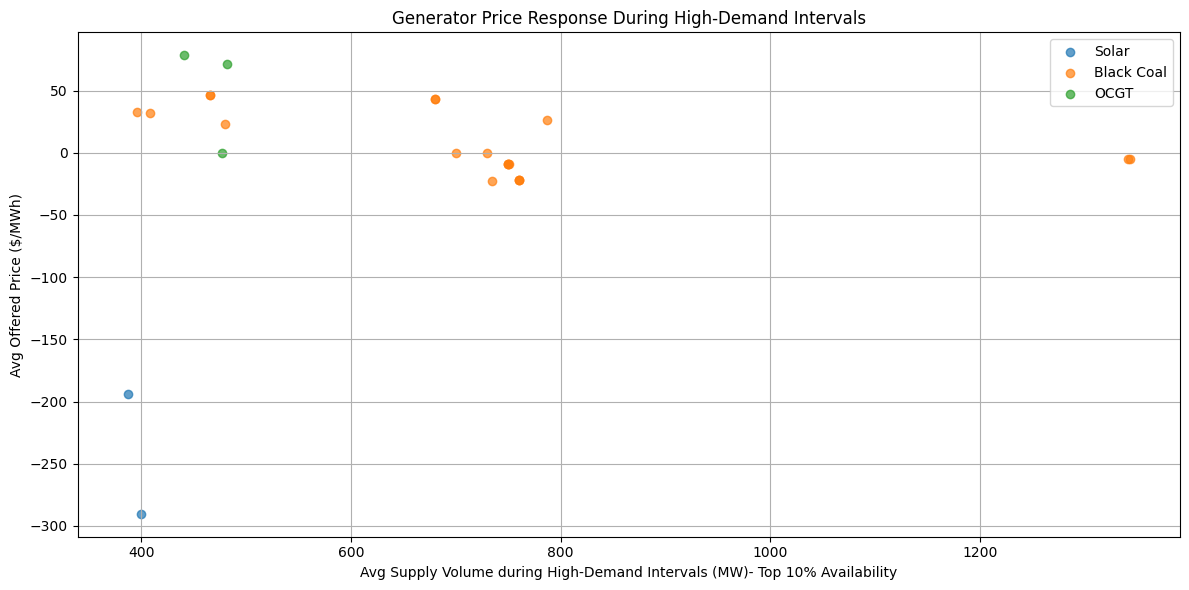

In [28]:
# Assumes your dataframe is named `df` and has already been cleaned/loaded
# Convert INTERVAL_DATETIME to datetime
df['INTERVAL_DATETIME'] = pd.to_datetime(df['INTERVAL_DATETIME'])

# Step 1: Calculate total availability per 5-minute interval
band_avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]
df['Total_Avail'] = df[band_avail_cols].sum(axis=1)

# Step 2: Identify high demand intervals (top 10% by availability)
threshold = df['Total_Avail'].quantile(0.9)
high_demand_df = df[df['Total_Avail'] >= threshold]

# Step 3: Calculate volume-weighted average offer price per DUID at high demand intervals
price_cols = [f'PRICEBAND{i}' for i in range(1, 11)]
high_demand_df['Total_Offered_Value'] = high_demand_df[price_cols].values @ high_demand_df[band_avail_cols].values.T.diagonal()
high_demand_df['Total_Offered_Volume'] = high_demand_df[band_avail_cols].sum(axis=1)
high_demand_df['Weighted_Avg_Price'] = high_demand_df['Total_Offered_Value'] / high_demand_df['Total_Offered_Volume']

# Step 4: Group by DUID and calculate responsiveness
grouped = high_demand_df.groupby('DUID').agg({
    'Total_Offered_Volume': 'mean',
    'Weighted_Avg_Price': 'mean',
    'Generation Type': 'first',
    'Region': 'first'
}).reset_index()

# Step 5: Plot volume vs price to show responsiveness
plt.figure(figsize=(12, 6))
for gen_type in grouped['Generation Type'].unique():
    subset = grouped[grouped['Generation Type'] == gen_type]
    plt.scatter(subset['Total_Offered_Volume'], subset['Weighted_Avg_Price'], label=gen_type, alpha=0.7)

plt.xlabel('Avg Supply Volume during High-Demand Intervals (MW)- Top 10% Availability')
plt.ylabel('Avg Offered Price ($/MWh)')
plt.title('Generator Price Response During High-Demand Intervals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


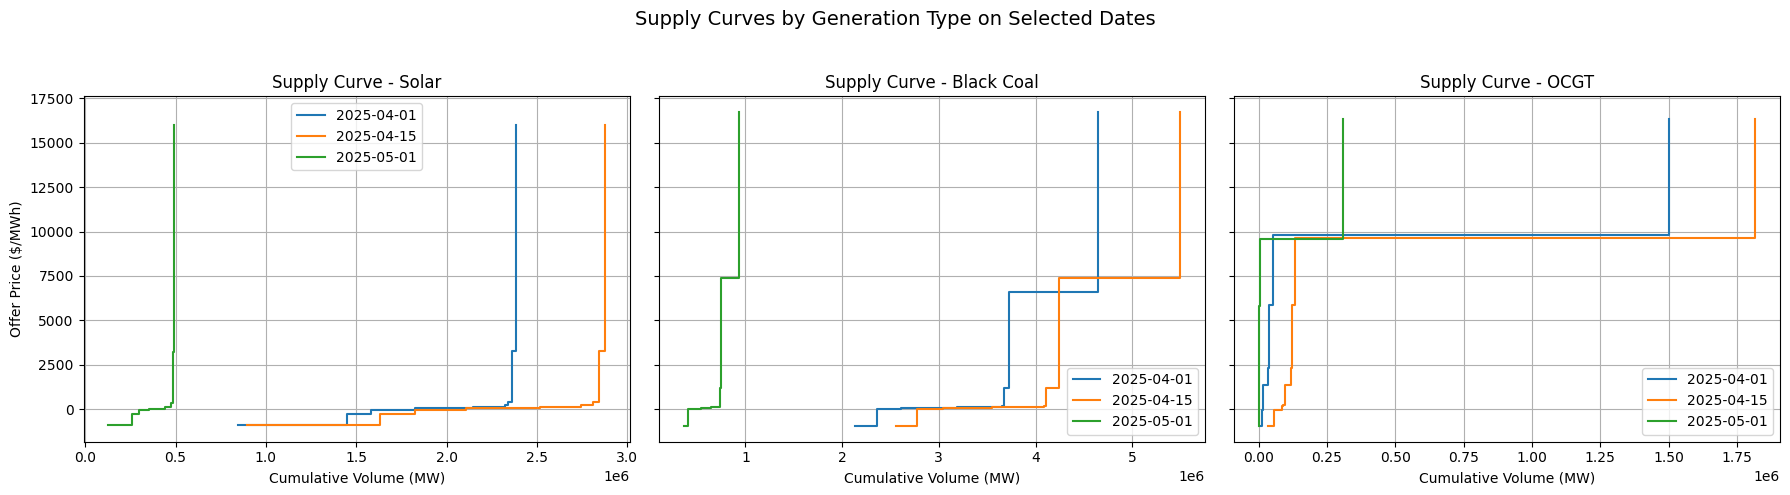

In [34]:
# Ensure datetime column is parsed
df['INTERVAL_DATETIME'] = pd.to_datetime(df['INTERVAL_DATETIME'])
df['DATE'] = df['INTERVAL_DATETIME'].dt.date

# Dates to compare
dates_to_compare = ['2025-04-01', '2025-04-15', '2025-05-01']

# Generation types to compare
gen_types = ['Solar', 'Black Coal', 'OCGT']

# Column names
band_avail_cols = [f'BANDAVAIL{i}' for i in range(1, 11)]
price_band_cols = [f'PRICEBAND{i}' for i in range(1, 11)]

# Plot supply curves by generation type and date
fig, axs = plt.subplots(1, len(gen_types), figsize=(18, 5), sharey=True)

for idx, gen_type in enumerate(gen_types):
    ax = axs[idx]
    
    for date in dates_to_compare:
        # Filter by generation type and date
        day_df = df[(df['Generation Type'] == gen_type) & (df['DATE'] == pd.to_datetime(date).date())]

        if day_df.empty:
            continue

        # Aggregate all bands over the day
        total_avail = day_df[band_avail_cols].sum().values
        total_price = day_df[price_band_cols].mean().values

        # Sort by price to build supply curve
        sorted_idx = total_price.argsort()
        sorted_prices = total_price[sorted_idx]
        sorted_avail = total_avail[sorted_idx]
        cumulative_avail = np.cumsum(sorted_avail)

        ax.step(cumulative_avail, sorted_prices, where='post', label=date)
    
    ax.set_title(f"Supply Curve - {gen_type}")
    ax.set_xlabel("Cumulative Volume (MW)")
    if idx == 0:
        ax.set_ylabel("Offer Price ($/MWh)")
    ax.legend()
    ax.grid(True)

plt.suptitle("Supply Curves by Generation Type on Selected Dates", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
